In [1]:
import pf_clonal_dynamics as pcd
import pandas as pd
import numpy as np
import numpyro

/Users/marlinfiggins/Library/Caches/pypoetry/virtualenvs/pf-clonal-dynamics-15Ta1Rl1-py3.9/lib/python3.9/site-packages/jax/experimental/optimizers.py:28: FutureWarning: jax.experimental.optimizers is deprecated, import jax.example_libraries.optimizers instead
  warnings.warn('jax.experimental.optimizers is deprecated, '
/Users/marlinfiggins/Library/Caches/pypoetry/virtualenvs/pf-clonal-dynamics-15Ta1Rl1-py3.9/lib/python3.9/site-packages/jax/experimental/stax.py:28: FutureWarning: jax.experimental.stax is deprecated, import jax.example_libraries.stax instead
  warnings.warn('jax.experimental.stax is deprecated, '


In [2]:
pf_meta = pd.read_csv("../data/pf_ama1_meta.tsv", sep="\t")
pf_haplo = pd.read_csv("../data/pf_ama1_haplotypes.tsv", sep="\t")

In [3]:
cohortid = 3578
pf_meta_ = pf_meta[pf_meta.cohortid == cohortid]
pf_haplo_ = pf_haplo[pf_haplo.cohortid == cohortid]

In [4]:
pf_meta_ = pf_meta_.rename(columns={"parasitedensity": "parasite_density"})
pf_haplo_ = pf_haplo_.rename(
    columns={"haplotype_reads":"reads", "h_popUID": "haplotype"})

In [5]:
VD = pcd.VariantData(pf_meta_, pf_haplo_)

In [6]:
VD.seq_names

array(['pfama1.00', 'pfama1.03', 'pfama1.04', 'pfama1.06', 'pfama1.07',
       'pfama1.09', 'pfama1.10', 'pfama1.11', 'pfama1.12', 'pfama1.18',
       'pfama1.19', 'pfama1.22', 'pfama1.31', 'pfama1.39'], dtype=object)

In [7]:
# Defining model: k is number of spline basis elements, xi_prior for overdispersion of sequences
PM = pcd.SplineModel(k=7, SLik=pcd.DirMultinomialSeq(xi_prior=100))

In [8]:
# Fitting SVI

from numpyro.infer.autoguide import AutoMultivariateNormal, AutoDelta

opt = numpyro.optim.Adam(step_size=1e-2)
iters = 10_000
num_samples = 3000
save = True
load = False

PH = pcd.fit_SVI(VD, PM, opt, guide_fn = AutoMultivariateNormal, iters=iters)

In [9]:
# Fitting MCMC
from numpyro.infer import NUTS, SA

#PH = pcd.fit_MCMC(VD, PM, kernel=SA, num_warmup=3000, num_samples=200)

In [10]:
# Returns dictionary with samples for posterior
PH.dataset

PH.dataset.keys()

dict_keys(['_auto_latent', 'beta', 'obs_error_scale', 'xi', 'Y', 'expected_parasite_density', 'freq', 'parasite_density', 'r', 'variant_specific_P'])

In [11]:
PH.dataset["obs_error_scale"]

DeviceArray([0.7520593 , 0.7500208 , 0.7570138 , 0.7454766 , 0.75099313,
             0.7510756 , 0.76402617, 0.74824363, 0.7463436 , 0.7528972 ,
             0.75378984, 0.75254935, 0.7516394 , 0.7525465 , 0.7541402 ,
             0.74927884, 0.74975395, 0.7526283 , 0.7497079 , 0.7397648 ,
             0.7546179 , 0.75448024, 0.7552488 , 0.75424576, 0.7530937 ,
             0.75392103, 0.7450726 , 0.7577851 , 0.7397305 , 0.74644566,
             0.7481007 , 0.7562679 , 0.75988805, 0.7604828 , 0.74701214,
             0.7613287 , 0.746498  , 0.742299  , 0.74401367, 0.7561932 ,
             0.74798834, 0.7575246 , 0.75200397, 0.7550509 , 0.762848  ,
             0.75745136, 0.75233155, 0.74045753, 0.7478093 , 0.7405782 ,
             0.7513017 , 0.7531239 , 0.7556316 , 0.7561024 , 0.75289255,
             0.7573596 , 0.7481028 , 0.75014985, 0.7575568 , 0.7531955 ,
             0.74660426, 0.7449017 , 0.75629073, 0.74777174, 0.74873424,
             0.74602723, 0.7463435 , 0.7421659 , 0.

In [12]:
PH.dataset["expected_parasite_density"]

DeviceArray([[4.7576665e-11, 1.4502637e-10, 4.3934559e-10, ...,
              6.3529113e-11, 2.8103755e-11, 1.3339697e-11],
             [5.7681072e-11, 1.7480047e-10, 5.3597515e-10, ...,
              2.1149599e-11, 9.1647488e-12, 4.7196678e-12],
             [2.8254926e-11, 9.1263719e-11, 2.9124239e-10, ...,
              3.9487122e-11, 1.7066255e-11, 7.8397063e-12],
             ...,
             [1.5641224e-11, 5.5121741e-11, 1.9287885e-10, ...,
              9.8055328e-11, 5.1268906e-11, 2.7742439e-11],
             [6.4430336e-11, 1.7468739e-10, 5.0362964e-10, ...,
              9.6774942e-11, 4.5843312e-11, 2.2593942e-11],
             [4.9463822e-11, 1.4881898e-10, 4.6581883e-10, ...,
              7.8907228e-11, 3.3643734e-11, 1.5948246e-11]],            dtype=float32)

In [13]:
PH.data.density

array([  0.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan, 128.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  32.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan, 144.,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  80.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   0.,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from pf_clonal_dynamics.plotfunctions import *
ps = DefaultAes.ps
alphas = DefaultAes.alphas
font = {'family' : 'Helvetica',
        'weight' : 'light',
        'size'   : 32}

matplotlib.rc('font', **font)

In [15]:
import random
def get_random_colors(n):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(v_names))]
v_names = VD.seq_names
v_colors = get_random_colors(len(v_names))
color_map = {v : c for c, v in zip(v_colors, v_names)}

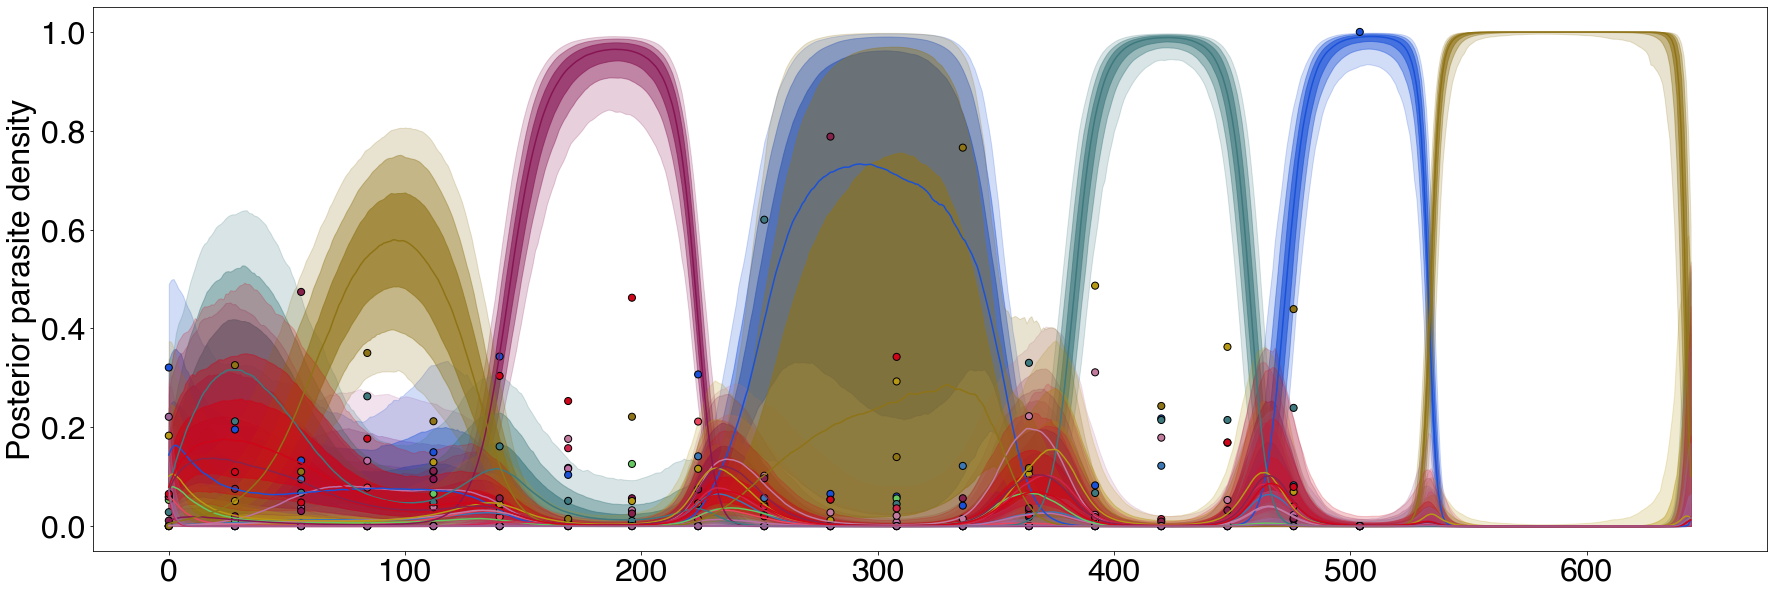

In [18]:
fig = plt.figure(figsize=(30, 10))
gs = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(gs[0,0])
dataset, VD = PH.dataset, PH.data
colors = [color_map[v] for v in VD.seq_names]
        
pcd.plot_posterior_frequency(ax, dataset, ps, alphas, colors=colors, forecast=False)
pcd.plot_observed_frequency_size(ax, VD, colors, lambda N: 50)
ax.set_ylabel("Posterior parasite density")
fig;

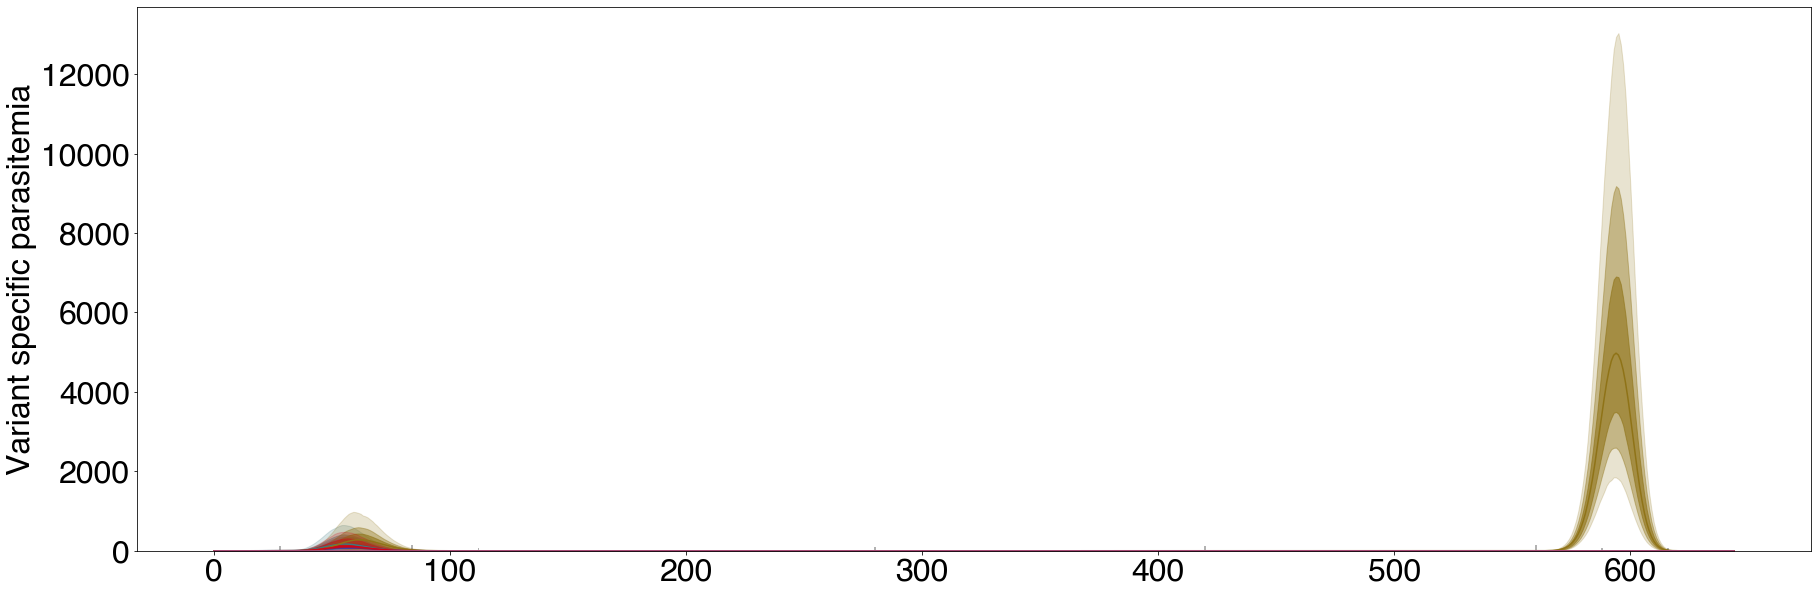

In [19]:
fig = plt.figure(figsize=(30, 10))
gs = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(gs[0,0])
dataset, LD = PH.dataset, PH.data
colors = [color_map[v] for v in LD.seq_names]
        
pcd.plot_posterior_parasite_density(ax, dataset, ps, alphas, colors, forecast=False)
pcd.plot_parasite_density(ax, LD)

ax.set_ylabel("Variant specific parasitemia")
fig;

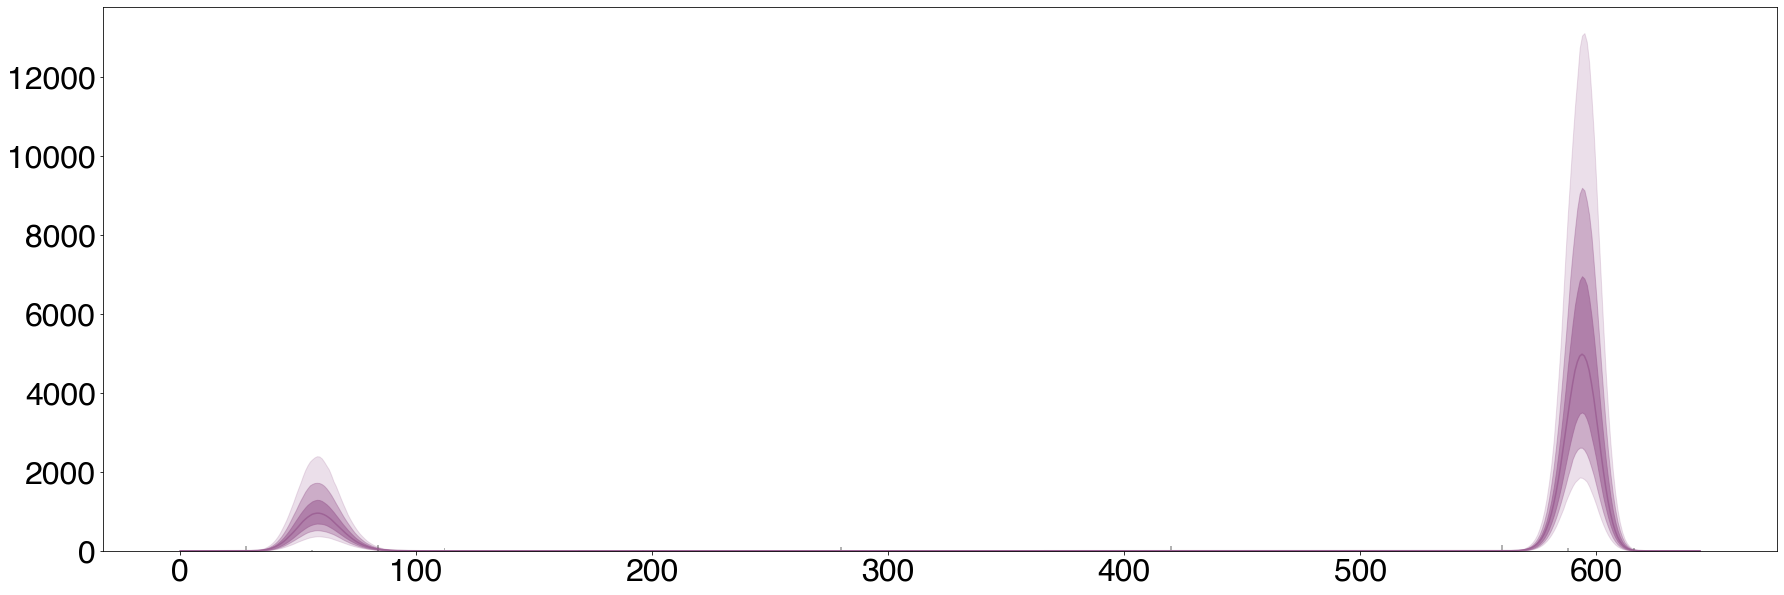

In [20]:
fig = plt.figure(figsize=(30, 10))
gs = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(gs[0,0])
dataset, LD = PH.dataset, PH.data
colors = [color_map[v] for v in LD.seq_names]
        
pcd.plot_posterior_smooth_EPD(ax, dataset, ps, alphas, v_colors[-1])
pcd.plot_parasite_density(ax, LD)

fig;

AttributeError: module 'pf_clonal_dynamics' has no attribute 'plot_growth_rates'

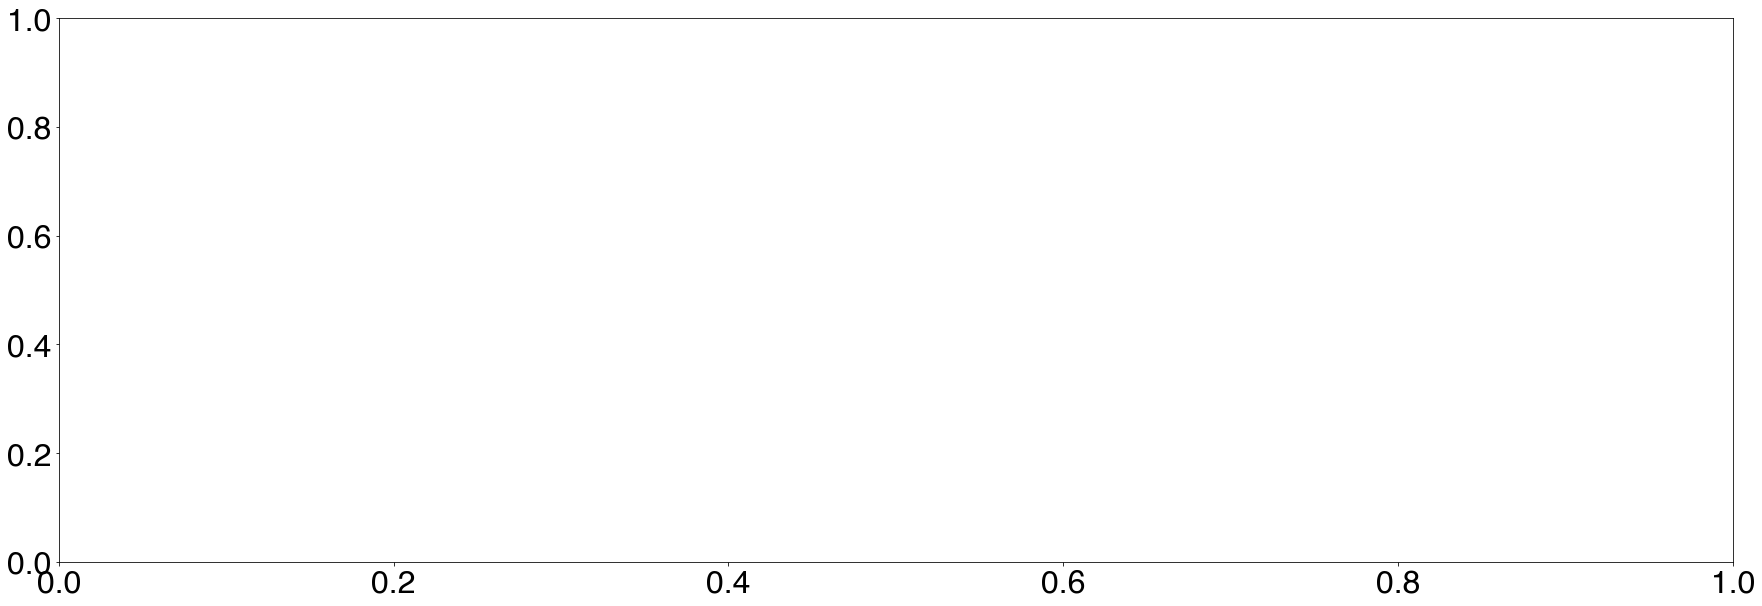

In [21]:
fig = plt.figure(figsize=(30, 10))
gs = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(gs[0,0])
dataset, LD = PH.dataset, PH.data
colors = [color_map[v] for v in LD.seq_names]
        
pcd.plot_growth_rates(ax, dataset, ps, alphas, colors, forecast=False)

ax.set_ylabel("Variant specific growth rates")
fig;